# How To Make an Application of High Ratings in Google Play Store

Author: **Mari Kang**

This project identifies the relationships between the rating of the application and other factors of the applications including price, genre, and size. The primary goal of this project is to find correlation or interesting findngs about the rating and figure out an optimal way to make an application of high ratings in google play store. 

Run the cell below each time the notebook is started or restarted to ensure that if you change any code in the library, this notebook will use the latest version of the library code.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Introduction

The main question I'm trying to answer from this project is, 'What factors account for application rating in Google Play Store?'

When creating an mobile application, considering the customer's perspective is significant in order to get good application rating. The ratings of application given by customers directly affect the rank of the application, and applications with high rank will be more exposed to customers, resulting more downloads. Moreover, applications with low rating will block users from downloading the app since low rating means that there's some unsatisfaction or flaw in the application. Thus, discovering the factors that influence the rating of the application can help people make an application with high ratings. In this project, I'm going to collect data of applications that contains information of each application such as price, genre, and size and find the correlation between them with ratings to see if there's any factor that account for the application rating.

## Methodology

Among multiple application stores, I chose 'Google Play Store' because it is one of the most popular application store and the website of the store is well organized and the applications are categorized. I collected data from the [Google Play Website](https://play.google.com/store/apps?hl=en&gl=US), especially from the top chart page and some of the main category pages. I programmatically download the IDs using 'requests' and 'BeautifulSoup' library. Then, using these IDs, I collected the information about the application using 'Google-Play-Scrapper' library and stored in a csv file. 

### Collect IDs from Google Play Store

To begin with, I used `find_ids` function to collect the IDs from Google Play Store. The `find_ids` function takes a `url` of a google play store page that has 'See More' buttons that leads to a page that has more applications in that category. It also takes a list that the IDs of the application in the page will be appended. This function goes to all 'See More' pages in the input url and collects all the IDs of the applications that are not repeated in the list. Since this process take a long time, I decided to use the `top chart` page and only part of category pages including business, education, medial, music and audio, communication, and game. The returning list of this funciton will contain the application IDs.

In [3]:
from collect_appdata import find_ids

# Set a list of url that IDs will be obtained.
url_list = ['https://play.google.com/store/apps/top?hl=en&gl=US',
            'https://play.google.com/store/apps/category/BUSINESS?hl=en&gl=US',
           'https://play.google.com/store/apps/category/EDUCATION?hl=en&gl=US',
           'https://play.google.com/store/apps/category/MEDICAL?hl=en&gl=US',
            'https://play.google.com/store/apps/category/MUSIC_AND_AUDIO?hl=en&gl=US',
            'https://play.google.com/store/apps/category/COMMUNICATION?hl=en&gl=US',
           'https://play.google.com/store/apps/category/GAME?hl=en&gl=US']

# Set an empty list to hold application IDs.
final_idlist = []

# For url in the url list, find all the application IDs and put it in the ID list.
for url in url_list:
    final_idlist = find_ids(url, final_idlist)


### Collect Data from IDs

Then, using the list of IDs collected above, I obtained the information of the data. The `collect_app_info` function takes the list of IDs, the name of the csv file that the data will be filled in, and the language and the country of the applications. `Google-play-scrapper` is a library that helps obtaining the information of the data, and I used function `app` in this library that takes the ID, language, and country of the application and returns the information including the title, size, description, and more. The information this function is collecting are title, price, score(rating), content rating, free/paid, genre, and size. Lastly, it `csv` library to put the data into a csv file. 

In [4]:
from collect_appdata import collect_app_info

# Collect the app data into a csv file.
collect_app_info(final_idlist, 'final_appdata', 'en', 'us')

Now, I have a csv file of name `final_appdata` that contains the information of the applications. I will use `pandas` library to read the csv file and drop rows that has no value in score since the data with no score value can't be used in this project.

In [5]:
# Read the csv file.
app_data = pd.read_csv('final_appdata.csv')

# Drop the rows that contain NaN value in column 'score'.
app_data.dropna(subset = ['score'], inplace=True)

app_data

,free,genre,contentRating,size,score,title,price
0,True,Social,Teen,31M,2.993713,Parler,0.00
1,True,Business,Everyone,109M,3.401708,ZOOM Cloud Meetings,0.00
2,True,Social,Teen,83M,4.530123,TikTok,0.00
3,True,Shopping,Everyone,104M,3.843515,Walmart Shopping & Grocery,0.00
4,True,Finance,Everyone,32M,4.219018,Cash App,0.00
...,...,...,...,...,...,...,...
926,False,Communication,Everyone,Varies with device,4.354497,Conversations (Jabber / XMPP),2.49
927,False,Communication,Everyone,Varies with device,4.207921,p≡p - The pEp email client with Encryption,0.99
928,False,Communication,Everyone,3.6M,3.958042,WazzapMigrator,8.49
929,False,Communication,Everyone,23M,3.940000,eXport-it UPnP Client/Server,2.15


## Results

First, I created a graph of Rating vs. Price of Paid Applications to discover the correlation between the price of the application and the application ratings. The `paid_app` function takes the dataframe of the application data and creates a scatter plot of ratings vs price.

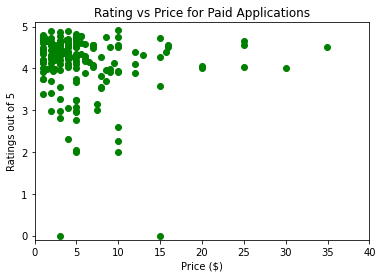

In [7]:
import read_appdata

read_appdata.paid_app(app_data)

### Observation 
- For applications of price in range of 0 to 10 dollars, the variation of the rating increases when the price increases. The rating is within 4 to 5 for applications below 1 dollar, while the rating has range of 2 to 5 for applications that costs 5 dollars. 
- There are not many applications of price over 20 dollars, so it is difficult to find the correlation of the rating and the price over 20 dollars. 

In this graph, I could see that there's more possibility for an application to get high rating with less variation when it has lower price from 0 to 10 dollars. In other words, if making a paid app that costs below 10 dollars, it is more likely to get higher rating in the lower price. 

Then, I made a box plot of Rating vs. Genre of the Applications to see if there's any relationship between the genre and the application rating. Since there are a lot of genre and not all genre has sufficient number of applications that are categorized in, the function `box_plot_genre` filters the application in genre that the count of the genre is larger than 20.

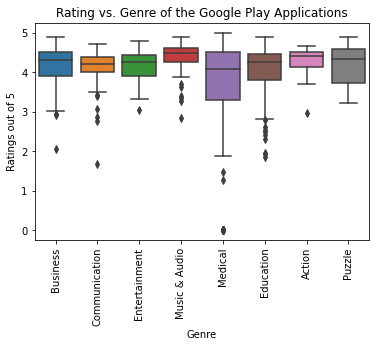

In [8]:
read_appdata.box_plot_genre(app_data)

### Observation
- 'Music and Audio' genre has the highest median and the smallest interquartile range among the genre in the graph.
- 'Medial' genre has the smallest median and the largest interquartile range among the genre in the graph.
- The median of ratings in all of the genre in the graph is above 4.0.

This graph is restricted to the filtered genre in the graph, it is difficult to make a general conclusion about the observation. Still, it is interesting to find that there's different median and range of the ratings for different genre. When choosing to make applications within the genre in the graph, choosing the 'Music & Audio' genre will most likely get high ratings and the possibility of gettiing ratings below 4 is small. On the other hand, choosing the 'Medical' genre has more possibility to get low ratings, even below 3. 

Next, I created a categorical plot that shows the correlation between the ratings and the content ratings of the application. 'Content rating' is rating given to application that assigns the appropriate users of the app in terms of age. 

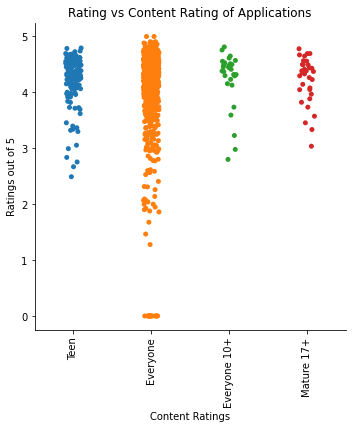

In [9]:
read_appdata.cat_plot_content(app_data)

### Observation
- The applications that has content rating of 'Everyone' has most diversity in the rating.
- The applications that has coneten rating besides 'Everyone' has similar range of ratings around 3 to 4.8.

This graph doesn't contain big correlation between the content rating and the rating of 5. The only interesting discovery in this graph is that there's more possibility to get low ratings when the application is assigned to the content rating of 'Everyone'.

Another visualization I created is a linear regression plot of ratings and size of the applications to find linear relationship between the ratings and application size. Since the 'size' column is string not a number, I first used `neat_data` function that removes the rows that doesn't have defined size and changed the values into float. 

In [10]:
neat_data = read_appdata.neat_data(app_data)
neat_data

,free,genre,contentRating,appSize,score,title,price
0,True,Social,Teen,31.0,2.993713,Parler,0.00
1,True,Business,Everyone,109.0,3.401708,ZOOM Cloud Meetings,0.00
2,True,Social,Teen,83.0,4.530123,TikTok,0.00
3,True,Shopping,Everyone,104.0,3.843515,Walmart Shopping & Grocery,0.00
4,True,Finance,Everyone,32.0,4.219018,Cash App,0.00
...,...,...,...,...,...,...,...
924,False,Communication,Everyone,3.1,3.418719,Private Browser - Fast VPN Incognito Browser,1.99
925,False,Communication,Everyone,3.2,3.993151,Lightning Browser Plus - Web Browser,1.49
928,False,Communication,Everyone,3.6,3.958042,WazzapMigrator,8.49
929,False,Communication,Everyone,23.0,3.940000,eXport-it UPnP Client/Server,2.15


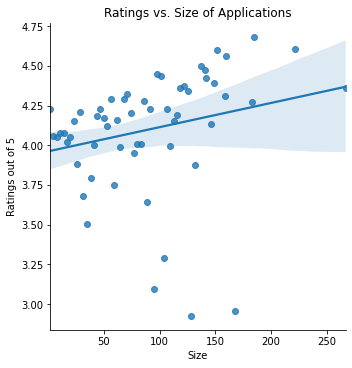

In [11]:
read_appdata.size_and_rating(neat_data)

### Observation
- The application rating tends to increase when the size of the application increases. 

In this graph, I could see a linear correlation betweeen the application rating and the size. This means that if the size of the application is larger, it is more likely to get good ratings. This makes sense because when the size of the application is large, it implies that there are more functions and complexity in the application that can be beneficial to users and thus satisfies the users more. 

Lastly, I discovered the relationship between the rating and whether it's free or paid application. I used `free_and_paid` function that takes the dataframe of the information of application and categorize these applications in two: free and paid applications. Then, it creates a categorical plot of ratings over free and paid applications. 

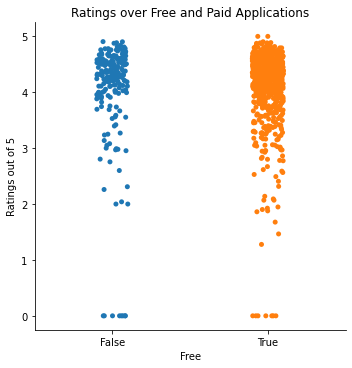

In [12]:
read_appdata.free_and_paid(app_data)

### Observation
- The ratings of paid application are mostly in the range of 4 to 5.
- The ratings of free application are mostly in the range of 3 to 5.

This graph shows that there are a lot of applications of ratings in range of 4 to 5 for both free and paid applications. However, the free applications are more likely to have ratings lower than 4 since the graph of free application is more spread downwards.

## Conclusion

Though there wasn't a big correlation between the ratings and the factors I investigated, I discovered some correlation that can help people who is planning to develop an applications. When creating an application, there's more possibility to get higher rating when creating a paid application than free application. And when deciding the price of the paid application, the application rating tends to decrease when the price increases from 0 to 10 dollars. When choosing the genre of the application, it is better to choose the genre that has higher median and smaller variation in the box plot above the guarantee an application of high ratings. It is also interesting to figure out that the application that the content is rated for everyone has more possibility to get low ratings.

The work in this project can be used as a first step for a person or a company to create a new application. By finding the factors that affects the ratings of the application, the app developers can make an application that satisfies the need of the users and increase the application ratings. This work is beneficial for both app developers and app users that the app developers can build a successful application that has high ratings, and the app users can find more satisfying application that reduces any inconveninence or unsatisfation. 

I learned that scrapping the web page and changing them into a dataframe is a complicated work. Since web scrapping can be used in various situations to collect data, I learned a lot of important skills throughout this project. I struggled the most in web scrapping part when I scrapped IDs from the Google Play Store. I rewrote the function multiple times because it was my first time using Beautifulsoup and getting data from a web page. It was confusing to read the HTML and find the appropriate class name to get useful information. Also, creating unit tests was also challenging since the functions used in this project were too specified to Google Play Store, and the ratings of the applications change every time, which means that I can't test most of the functions.

If I had more time, I would investigate on other factors that can also affect the ratings of the applications, or find a list of application that has significantly low ratings and find the common factors of these applications if any. 